In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)

2.15.0


In [8]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [9]:
def build_and_compile_model_input(k):
      model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(512, activation='relu', input_shape=(k,)),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1,activation='linear') 
    ])


      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0005),
                    loss="mse",
                    metrics=['mae'])
      return model

EPOCHS = 50

DATASET=pd.read_csv('data_nowe/dane_poj_wybrane.csv')


MODEL A - DANE BEZ PORY ROKU

In [10]:
dataset = DATASET
dataset

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw
0,2.0,1.0,0.000000,0.0
1,2.0,1.0,0.000694,0.0
2,2.0,1.0,0.001389,0.0
3,2.0,1.0,0.002083,0.0
4,2.0,1.0,0.002778,0.0
...,...,...,...,...
161275,1.0,7.0,0.996528,0.0
161276,1.0,7.0,0.997222,0.0
161277,1.0,7.0,0.997917,0.0
161278,1.0,7.0,0.998611,0.0


In [11]:
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model =build_and_compile_model_input(2)

In [12]:
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

Epoch 1/50


1008/1008 [==============================] - 3s 2ms/step - loss: 0.7099 - mae: 0.1792
Epoch 2/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7004 - mae: 0.1630
Epoch 3/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7005 - mae: 0.1636
Epoch 4/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6996 - mae: 0.1636
Epoch 5/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6998 - mae: 0.1636
Epoch 6/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6994 - mae: 0.1641
Epoch 7/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6992 - mae: 0.1640
Epoch 8/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6983 - mae: 0.1642
Epoch 9/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6981 - mae: 0.1646
Epoch 10/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6972 - mae: 0.1643
Epoch 11/50
1008/1008 [=================

In [13]:
model.evaluate(x_test, y_test, batch_size=128)

252/252 [==============================] - 0s 1ms/step - loss: 0.7035 - mae: 0.1656


[0.7034507989883423, 0.16558735072612762]

113/113 [==============================] - 0s 733us/step


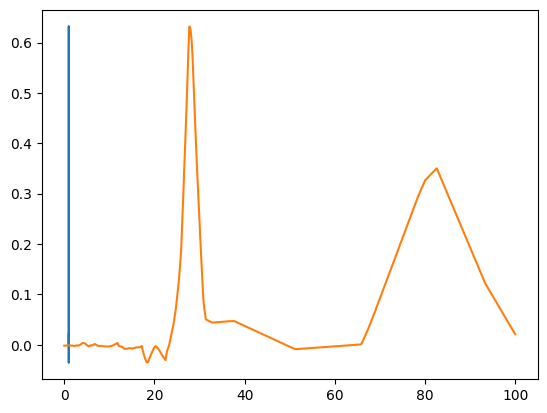

In [14]:
flow_time=np.arange(0,100,100/3600) 
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)

plt.plot(flow_time, flow_result)

MODEL B - TYLKO JEDEN DZIEŃ TYGODANIA


In [15]:


def prep_data(data,day):
      data=data.drop(columns="Pora_roku")
      data = data[data['Dzien_tygodnia'] == day]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      x=x.drop(columns="Dzien_tygodnia")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      return [x,y]

PONIEDZIAŁEK

Epoch 1/50
144/144 [==============================] - 1s 2ms/step - loss: 0.8835 - mae: 0.2369
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.8314 - mae: 0.2162
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.8202 - mae: 0.1950
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.8220 - mae: 0.2013
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.8157 - mae: 0.1906
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.8165 - mae: 0.1845
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.8209 - mae: 0.1919
Epoch 8/50
144/144 [==============================] - 0s 2ms/step - loss: 0.8193 - mae: 0.1830
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.8160 - mae: 0.1857
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.8133 - mae: 0.1811
Epoch 11/50
144/144 [============================

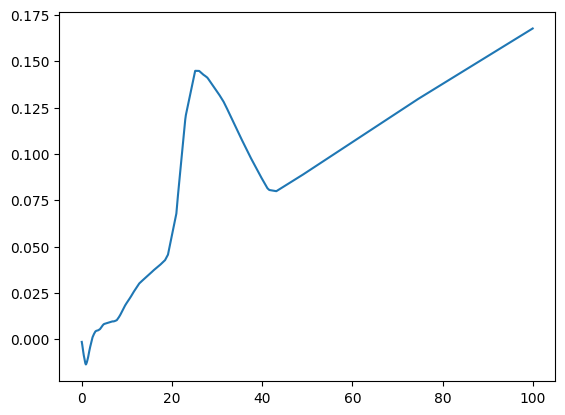

In [16]:
dataset = DATASET

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_pon=np.arange(0,100,100/3600) 
flow_result_pon = model.predict(flow_time_pon).T

plt.plot(flow_time_pon, flow_result_pon.reshape(3600))

WTOREK

Epoch 1/50
144/144 [==============================] - 1s 2ms/step - loss: 0.6993 - mae: 0.2039
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - mae: 0.1888
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6498 - mae: 0.1665
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6539 - mae: 0.1767
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6481 - mae: 0.1680
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6468 - mae: 0.1711
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6434 - mae: 0.1611
Epoch 8/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6418 - mae: 0.1494
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6434 - mae: 0.1553
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6410 - mae: 0.1535
Epoch 11/50
144/144 [============================

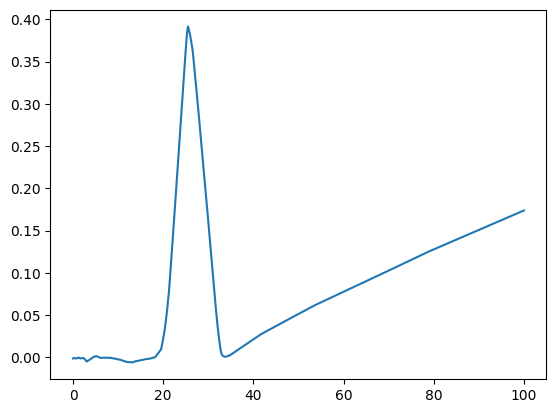

In [17]:
dataset = DATASET

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_wt=np.arange(0,100,100/3600) 
flow_result_wt = model.predict(flow_time_wt)

plt.plot(flow_time_wt, flow_result_wt.reshape(3600))

ŚRODA

Epoch 1/50
144/144 [==============================] - 1s 2ms/step - loss: 0.7817 - mae: 0.2136
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7496 - mae: 0.1760
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7536 - mae: 0.1896
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7427 - mae: 0.1724
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7447 - mae: 0.1725
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7453 - mae: 0.1734
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7444 - mae: 0.1731
Epoch 8/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7429 - mae: 0.1699
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7430 - mae: 0.1689
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7454 - mae: 0.1733
Epoch 11/50
144/144 [============================

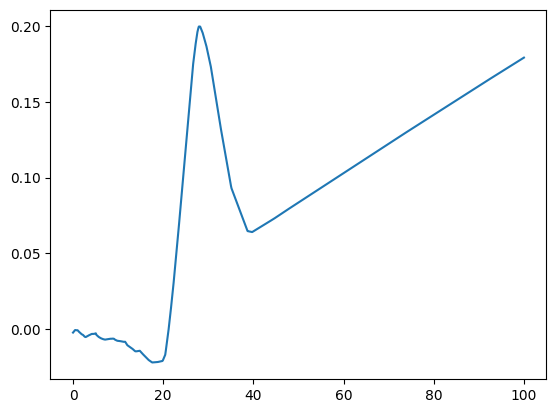

In [18]:
dataset = DATASET

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_sr=np.arange(0,100,100/3600)  
flow_result_sr = model.predict(flow_time_sr)   

plt.plot(flow_time_sr, flow_result_sr.reshape(3600))

CZWARTEK

Epoch 1/50
144/144 [==============================] - 1s 2ms/step - loss: 0.6870 - mae: 0.2102
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6856 - mae: 0.2024
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6645 - mae: 0.1655
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6613 - mae: 0.1621
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - mae: 0.1682
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - mae: 0.1608
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6610 - mae: 0.1603
Epoch 8/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - mae: 0.1482
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6571 - mae: 0.1509
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - mae: 0.1500
Epoch 11/50
144/144 [============================

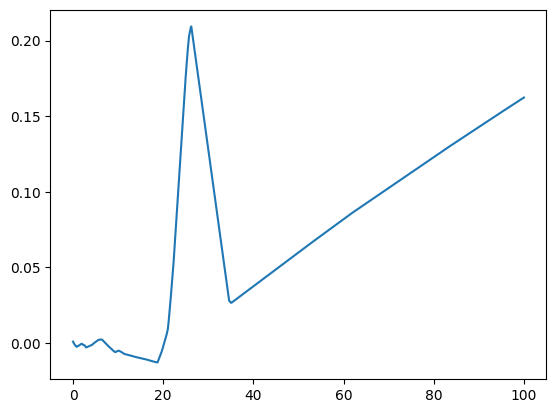

In [19]:
dataset = DATASET

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_czw=np.arange(0,100,100/3600) 
flow_result_czw = model.predict(flow_time_czw)   

plt.plot(flow_time_czw, flow_result_czw.reshape(3600))

PIĄTEK

Epoch 1/50
144/144 [==============================] - 1s 2ms/step - loss: 0.6203 - mae: 0.1994
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6042 - mae: 0.1765
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6056 - mae: 0.1703
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5996 - mae: 0.1602
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5962 - mae: 0.1544
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5961 - mae: 0.1539
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5950 - mae: 0.1496
Epoch 8/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5950 - mae: 0.1528
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5943 - mae: 0.1536
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5941 - mae: 0.1491
Epoch 11/50
144/144 [============================

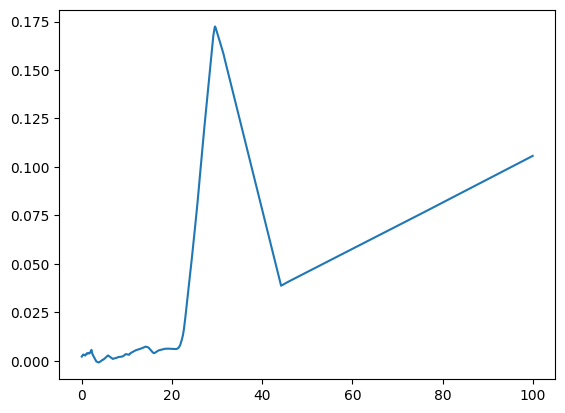

In [20]:
dataset = DATASET

[x,y]=prep_data(dataset,5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_pt=np.arange(0,100,100/3600)  
flow_result_pt = model.predict(flow_time_pt)   

plt.plot(flow_time_pt, flow_result_pt.reshape(3600))

SOBOTA

Epoch 1/50
144/144 [==============================] - 1s 2ms/step - loss: 0.6894 - mae: 0.2126
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6107 - mae: 0.1731
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6117 - mae: 0.1806
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6007 - mae: 0.1605
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5984 - mae: 0.1491
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6028 - mae: 0.1703
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5954 - mae: 0.1441
Epoch 8/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5960 - mae: 0.1498
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5948 - mae: 0.1458
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.5957 - mae: 0.1467
Epoch 11/50
144/144 [============================

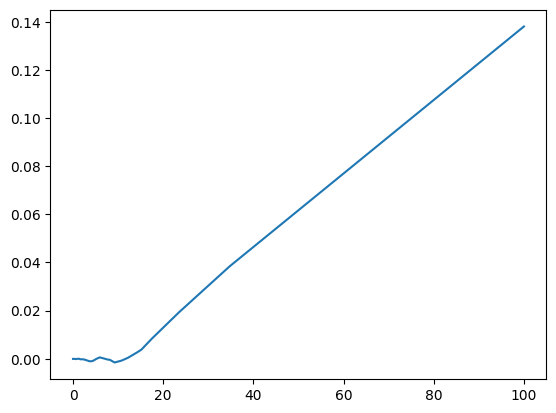

In [21]:
dataset = DATASET

[x,y]=prep_data(dataset,6)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_sob=np.arange(0,100,100/3600) 
flow_result_sob = model.predict(flow_time_sob)   

plt.plot(flow_time_sob, flow_result_sob.reshape(3600))

NIEDZIELA

Epoch 1/50
288/288 [==============================] - 1s 2ms/step - loss: 0.9006 - mae: 0.2531
Epoch 2/50
288/288 [==============================] - 0s 2ms/step - loss: 0.8631 - mae: 0.2018
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.8625 - mae: 0.1960
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.8550 - mae: 0.1832
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.8544 - mae: 0.1876
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.8547 - mae: 0.1845
Epoch 7/50
288/288 [==============================] - 0s 2ms/step - loss: 0.8535 - mae: 0.1884
Epoch 8/50
288/288 [==============================] - 0s 2ms/step - loss: 0.8556 - mae: 0.1875
Epoch 9/50
288/288 [==============================] - 0s 2ms/step - loss: 0.8537 - mae: 0.1829
Epoch 10/50
288/288 [==============================] - 0s 2ms/step - loss: 0.8532 - mae: 0.1881
Epoch 11/50
288/288 [============================

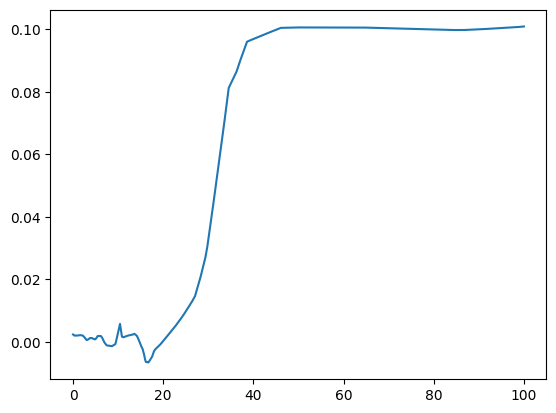

In [22]:
dataset = DATASET

[x,y]=prep_data(dataset,7)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=64)

flow_time_dn=np.arange(0,100,100/3600) 
flow_result_dn = model.predict(flow_time_dn)   

plt.plot(flow_time_dn, flow_result_dn.reshape(3600))

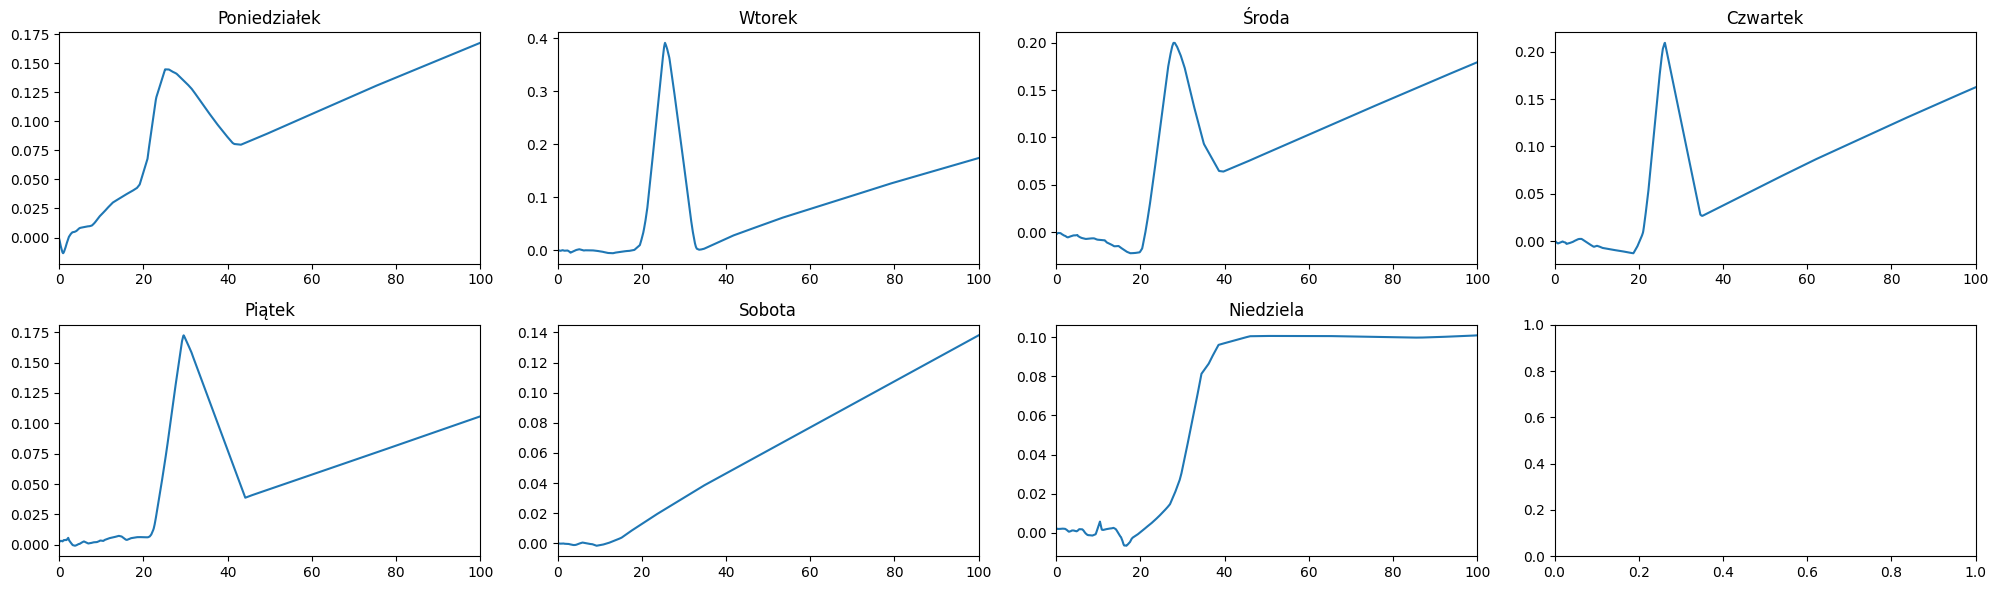

In [23]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(3600))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(3600))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(3600))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(3600))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(3600))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(3600))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_dn, flow_result_dn.reshape(3600))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)

plt.tight_layout()

plt.show()

MODEL C - DODANIE PORY ROKU

In [24]:
def prep_data(data,sezon):
      data = data[data['Pora_roku'] == sezon]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      y=y.drop(columns="Pora_roku")
      return [x,y]

WSZYSTKIE PORY ROKU

Epoch 1/50
1008/1008 [==============================] - 3s 2ms/step - loss: 0.7211 - mae: 0.1894
Epoch 2/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7014 - mae: 0.1647
Epoch 3/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7008 - mae: 0.1646
Epoch 4/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7001 - mae: 0.1632
Epoch 5/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6994 - mae: 0.1644
Epoch 6/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7001 - mae: 0.1634
Epoch 7/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6997 - mae: 0.1641
Epoch 8/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6997 - mae: 0.1646
Epoch 9/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6999 - mae: 0.1653
Epoch 10/50
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6995 - mae: 0.1643
Epoch 11/50
1008/1008 [======

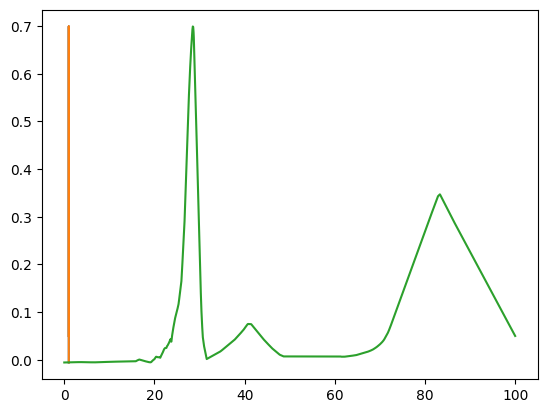

In [25]:
dataset = DATASET


dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Pora_roku")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = build_and_compile_model_input(3)


model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time=np.arange(0,100,100/3600) 
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)   

plt.plot(flow_time, flow_result)

WIOSNA

Epoch 1/50
252/252 [==============================] - 1s 2ms/step - loss: 250.6593 - mae: 3.1513
Epoch 2/50
252/252 [==============================] - 0s 2ms/step - loss: 1.1842 - mae: 0.5686
Epoch 3/50
252/252 [==============================] - 0s 2ms/step - loss: 2.1993 - mae: 0.8824
Epoch 4/50
252/252 [==============================] - 0s 2ms/step - loss: 2.8663 - mae: 1.0526
Epoch 5/50
252/252 [==============================] - 0s 2ms/step - loss: 8.9169 - mae: 1.7978
Epoch 6/50
252/252 [==============================] - 0s 2ms/step - loss: 2.0168 - mae: 0.7757
Epoch 7/50
252/252 [==============================] - 0s 2ms/step - loss: 4.1720 - mae: 1.1910
Epoch 8/50
252/252 [==============================] - 0s 2ms/step - loss: 2.8781 - mae: 1.0368
Epoch 9/50
252/252 [==============================] - 0s 2ms/step - loss: 4.7482 - mae: 1.4539
Epoch 10/50
252/252 [==============================] - 1s 2ms/step - loss: 5.3106 - mae: 1.4827
Epoch 11/50
252/252 [==========================

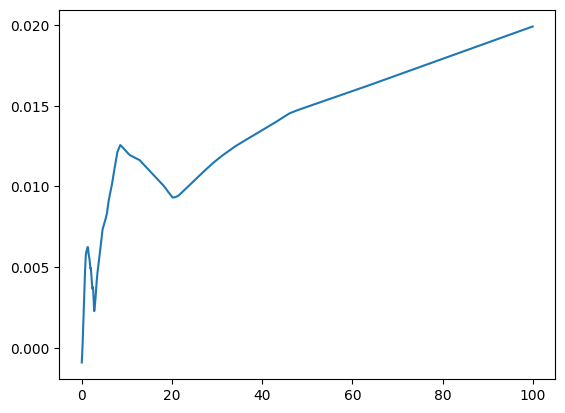

In [26]:
dataset = DATASET

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_spring_plot=np.arange(0,100,100/3600) 
flow_time_spring=np.vstack((1*np.ones_like(flow_time_spring_plot, dtype=int),1*np.ones_like(flow_time_spring_plot, dtype=int),flow_time_spring_plot)).T
flow_result_spring = model.predict(flow_time_spring)   

plt.plot(flow_time_spring_plot, flow_result_spring)

LATO

Epoch 1/50
252/252 [==============================] - 1s 2ms/step - loss: 169.3792 - mae: 2.5274
Epoch 2/50
252/252 [==============================] - 0s 2ms/step - loss: 0.5990 - mae: 0.2901
Epoch 3/50
252/252 [==============================] - 0s 2ms/step - loss: 0.5925 - mae: 0.2851
Epoch 4/50
252/252 [==============================] - 1s 2ms/step - loss: 0.7947 - mae: 0.3729
Epoch 5/50
252/252 [==============================] - 0s 2ms/step - loss: 0.9461 - mae: 0.4995
Epoch 6/50
252/252 [==============================] - 1s 2ms/step - loss: 0.7731 - mae: 0.4256
Epoch 7/50
252/252 [==============================] - 0s 2ms/step - loss: 1.0051 - mae: 0.5588
Epoch 8/50
252/252 [==============================] - 0s 2ms/step - loss: 1.2497 - mae: 0.6077
Epoch 9/50
252/252 [==============================] - 1s 2ms/step - loss: 1.1584 - mae: 0.6329
Epoch 10/50
252/252 [==============================] - 0s 2ms/step - loss: 1.6408 - mae: 0.7770
Epoch 11/50
252/252 [==========================

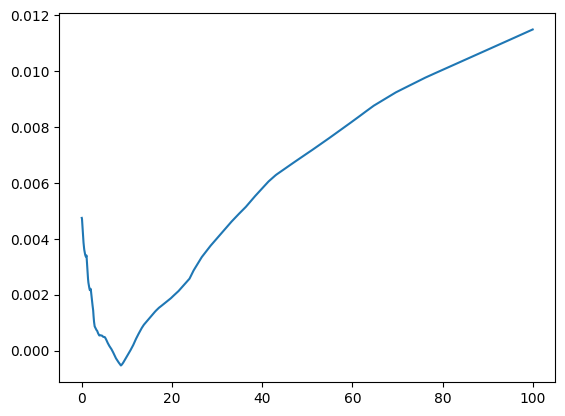

In [27]:
dataset = DATASET

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_summer_plot=np.arange(0,100,100/3600) 
flow_time_summer=np.vstack((2*np.ones_like(flow_time_summer_plot, dtype=int),1*np.ones_like(flow_time_summer_plot, dtype=int),flow_time_summer_plot)).T
flow_result_summer = model.predict(flow_time_summer)   

plt.plot(flow_time_summer_plot, flow_result_summer)

JESIEŃ

Epoch 1/50
252/252 [==============================] - 1s 2ms/step - loss: 47.2647 - mae: 1.4836
Epoch 2/50
252/252 [==============================] - 0s 2ms/step - loss: 1.0389 - mae: 0.4745
Epoch 3/50
252/252 [==============================] - 0s 2ms/step - loss: 1.5348 - mae: 0.6439
Epoch 4/50
252/252 [==============================] - 0s 2ms/step - loss: 2.2711 - mae: 0.8368
Epoch 5/50
252/252 [==============================] - 0s 2ms/step - loss: 2.2613 - mae: 0.9740
Epoch 6/50
252/252 [==============================] - 0s 2ms/step - loss: 2.2615 - mae: 0.9158
Epoch 7/50
252/252 [==============================] - 0s 2ms/step - loss: 1.7031 - mae: 0.7094
Epoch 8/50
252/252 [==============================] - 0s 2ms/step - loss: 2.4213 - mae: 0.9618
Epoch 9/50
252/252 [==============================] - 1s 2ms/step - loss: 1.7113 - mae: 0.7138
Epoch 10/50
252/252 [==============================] - 0s 2ms/step - loss: 1.3344 - mae: 0.6372
Epoch 11/50
252/252 [===========================

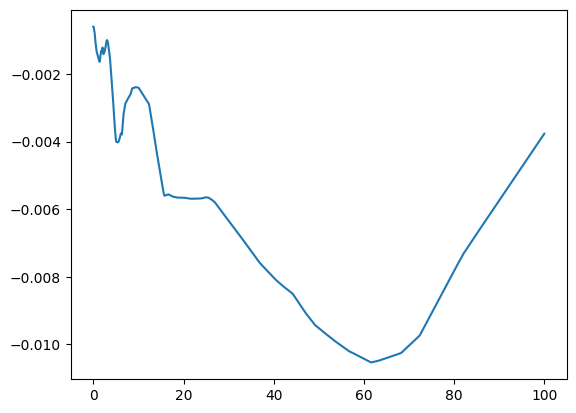

In [28]:
dataset = DATASET

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_fall_plot=np.arange(0,100,100/3600) 
flow_time_fall=np.vstack((3*np.ones_like(flow_time_fall_plot, dtype=int),1*np.ones_like(flow_time_fall_plot, dtype=int),flow_time_fall_plot)).T
flow_result_fall = model.predict(flow_time_fall)   

plt.plot(flow_time_fall_plot, flow_result_fall)

ZIMA

Epoch 1/50
252/252 [==============================] - 1s 2ms/step - loss: 91.9331 - mae: 2.0697
Epoch 2/50
252/252 [==============================] - 0s 2ms/step - loss: 4.9404 - mae: 1.4534
Epoch 3/50
252/252 [==============================] - 0s 2ms/step - loss: 3.9077 - mae: 1.1697
Epoch 4/50
252/252 [==============================] - 1s 2ms/step - loss: 9.3776 - mae: 1.7589
Epoch 5/50
252/252 [==============================] - 0s 2ms/step - loss: 2.4078 - mae: 0.9590
Epoch 6/50
252/252 [==============================] - 0s 2ms/step - loss: 2.5705 - mae: 0.9205
Epoch 7/50
252/252 [==============================] - 0s 2ms/step - loss: 4.3236 - mae: 1.2234
Epoch 8/50
252/252 [==============================] - 0s 2ms/step - loss: 3.7317 - mae: 1.2164
Epoch 9/50
252/252 [==============================] - 0s 2ms/step - loss: 2.8582 - mae: 1.0440
Epoch 10/50
252/252 [==============================] - 0s 2ms/step - loss: 3.5404 - mae: 0.9338
Epoch 11/50
252/252 [===========================

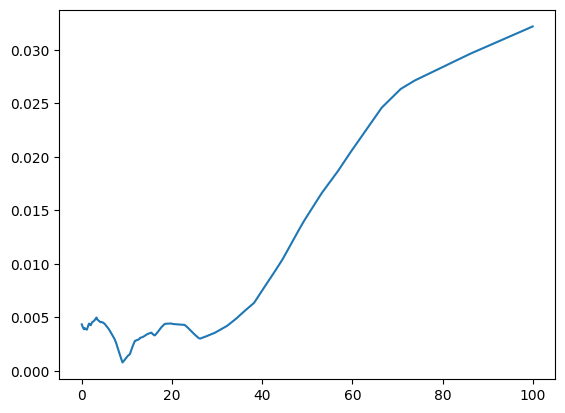

In [29]:
dataset = DATASET

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_winter_plot=np.arange(0,100,100/3600) 
flow_time_winter=np.vstack((4*np.ones_like(flow_time_winter_plot, dtype=int),1*np.ones_like(flow_time_winter_plot, dtype=int),flow_time_winter_plot)).T
flow_result_winter = model.predict(flow_time_winter)   

plt.plot(flow_time_winter_plot, flow_result_winter)

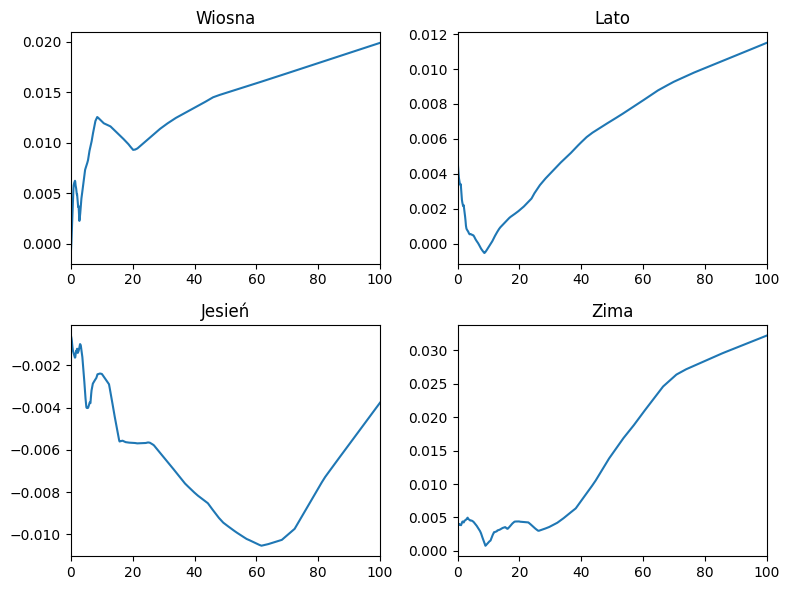

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0,0].plot(flow_time_spring_plot, flow_result_spring)
axs[0,0].set_title('Wiosna')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_summer_plot, flow_result_summer)
axs[0,1].set_title('Lato')
axs[0,1].set_xlim(0, 100)

axs[1,0].plot(flow_time_fall_plot, flow_result_fall)
axs[1,0].set_title('Jesień')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_winter_plot, flow_result_winter)
axs[1,1].set_title('Zima')
axs[1,1].set_xlim(0, 100)

plt.tight_layout()

plt.show()

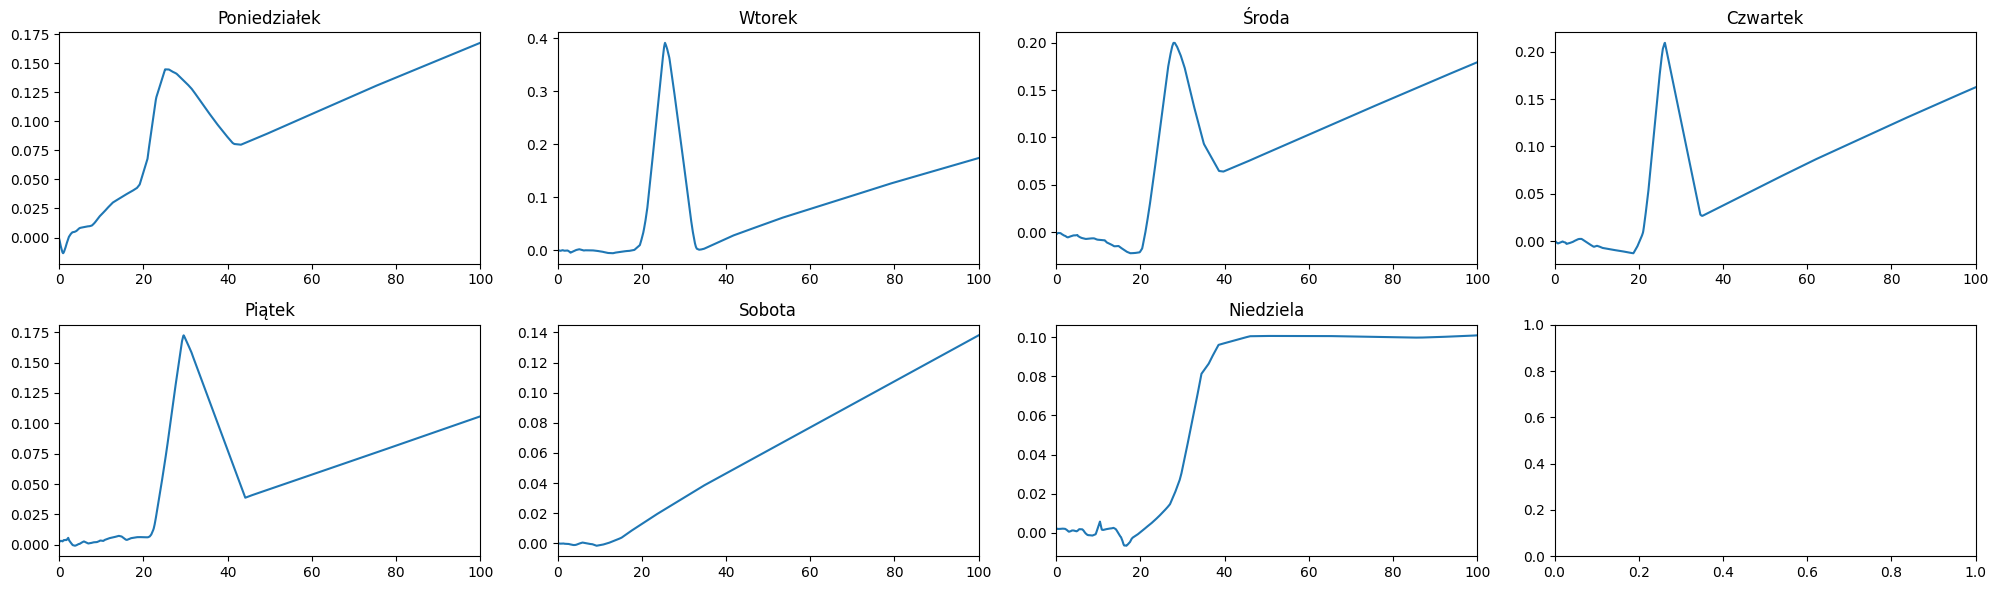

In [31]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(3600))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(3600))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(3600))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(3600))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(3600))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(3600))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_dn, flow_result_dn.reshape(3600))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)

plt.tight_layout()

plt.show()